# Unadjusted Langevin Algorithm

Given the target density $\pi(x)$, the ULA algorithm is defined as
\begin{align*}
X_{k+1} = X_k + \gamma \nabla \log \pi(X_k) + \sqrt{2\gamma} Z_{k+1},
\end{align*}
where $Z_{k+1} \sim \mathcal{N}(0, I_d)$. Below we provide an implementation for bivariate Gaussian target density
\begin{align*}
\pi(x) = \frac{1}{2\pi \sqrt{|\Sigma|}} \exp\left(-\frac{1}{2} (x - \mu)^T \Sigma^{-1} (x - \mu)\right),
\end{align*}
where $\mu = (0, 0)^T$ and $\Sigma = \begin{pmatrix} 1 & 0.8 \\ 0.8 & 1 \end{pmatrix}$.

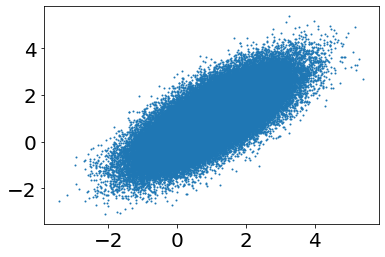

In [27]:
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats

# Set the seed
rng = np.random.default_rng(12345)

def log_gauss_2d(x, mu, sigma):
    return -0.5 * np.dot(x - mu, np.linalg.solve(sigma, x - mu))

def log_gauss_2d_grad(x, mu, sigma):
    return - np.linalg.solve(sigma, x - mu)

N = 100000
x = np.zeros((N, 2))

# Set the initial value
x[0] = np.array([0, 0])

# Set the parameters of the target distribution
mu = np.array([1, 1])
sigma = np.array([[1, 0.8], [0.8, 1]])
gam = 0.1

for i in range(1, N):
    x[i] = x[i - 1] + gam * log_gauss_2d_grad(x[i - 1], mu, sigma) + np.sqrt(2 * gam) * rng.normal(size = 2)

plt.scatter(x[:, 0], x[:, 1], s = 1)
plt.show()